In [ ]:
  !pip install kaggle

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#DATA PROFILING

#loading the dataset

df=pd.read_csv("ds_salaries.csv")
print(df.head())

#display basic info
print("Basic info")
print(df.info())

#summary stats
print("summary stats")
print(df.describe())

#value counts
print("Value Counts")
print(df.value_counts())






   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US

Checking Null Values
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Checking Duplicated rows
1171
Basic info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   string
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3

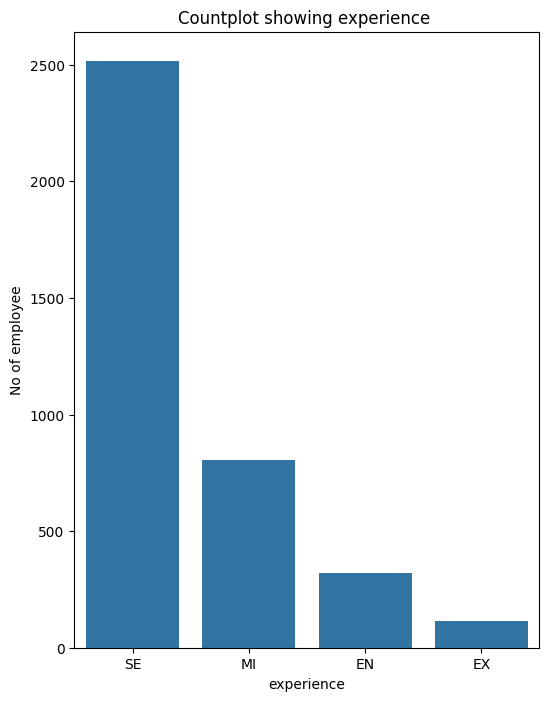

In [ ]:
#DATA QUALITY CHECK

#checking null-values
print("Checking Null Values")
print(df.isnull().sum())

#duplicated row
print("Checking Duplicated rows")
print(df.duplicated().sum())

df['experience_level'] = df['experience_level'].astype('string')

#display basic info
print("Basic info")
print(df.info())


#VISUALIZATION

#Visualizing categorical variable
plt.figure(figsize=(6,8))
sns.countplot(x="experience_level",data=df)
plt.title("Countplot showing experience ")
x_label=plt.xlabel("experience")
y_label=plt.ylabel("No of employee")
plt.show()



In [ ]:
# Histogram

sns.histplot(df['experience_level'],label="Experience level ",kde=True)
plt.legend()
plt.show()


#Boxplot
sns.boxplot(x="experience_level", y="salary_in_usd", data=df)
plt.title("Salary by Experience Level")
plt.show()


NameError: name 'sns' is not defined

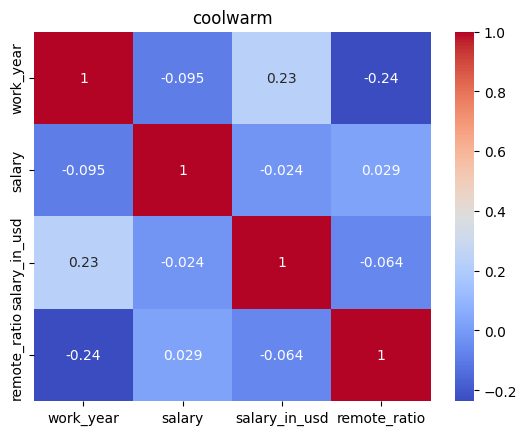

In [ ]:
# Corelation matrix (numeric only)
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("coolwarm")
plt.show()


In [ ]:
#Handling duplicates
df_copy=df.copy()




In [ ]:
df_copy.duplicated().sum()




np.int64(1171)

In [ ]:
df_copy.drop_duplicates(inplace=True)



In [ ]:
df_copy.duplicated().sum()




np.int64(0)

In [ ]:
df_copy

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
#Handling outliers
q1=df_copy['salary_in_usd'].quantile(0.25)
q3=df_copy['salary_in_usd'].quantile(0.75)
iqr=q3-q1
df_copy=df_copy[(df_copy['salary_in_usd']>=q1-1.5*iqr)& (df_copy['salary_in_usd']<=q3+1.5*iqr)]

In [ ]:
df_copy

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


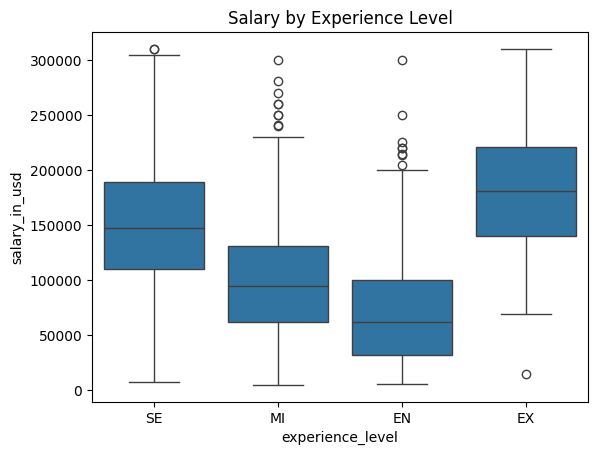

In [ ]:
#viewing if outliners are still present
sns.boxplot(x="experience_level", y="salary_in_usd", data=df_copy)
plt.title("Salary by Experience Level")
plt.show()


In [ ]:
#Feature Engineering
df_copy.drop(columns='salary',inplace=True)

<ipython-input-158-14abcd195750>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.drop(columns='salary',inplace=True)


In [ ]:
df_copy.drop(columns='salary_currency',inplace=True)

<ipython-input-159-c7ba5fd44ad5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.drop(columns='salary_currency',inplace=True)


In [ ]:
df_copy

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Data Specialist,165000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [ ]:
df_copy["is_fully_remote"] = (df_copy["remote_ratio"] == 100).astype(int)


<ipython-input-161-f32fd59b40c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["is_fully_remote"] = (df_copy["remote_ratio"] == 100).astype(int)


<ipython-input-162-d043c9de201c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_fully_remote", data=df_copy, palette="Set1")


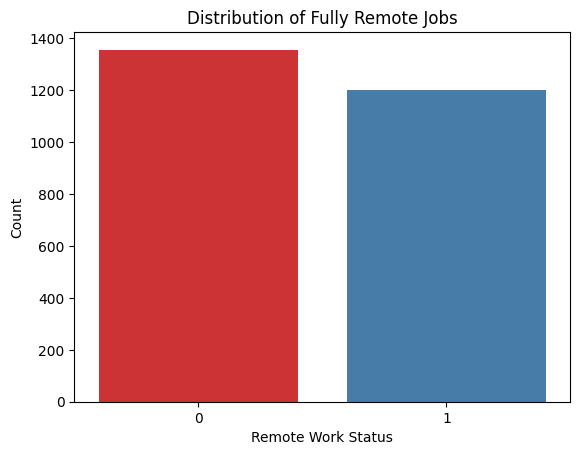

In [ ]:
sns.countplot(x="is_fully_remote", data=df_copy, palette="Set1")
plt.title("Distribution of Fully Remote Jobs")
plt.xlabel("Remote Work Status")
plt.ylabel("Count")
plt.show()


In [ ]:
# encoding categorical column
df_copy["company_size"]= df_copy["company_size"].map({"S":0,"M":1,"L":2})

<ipython-input-163-f0b93baf51c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["company_size"]= df_copy["company_size"].map({"S":0,"M":1,"L":2})


In [ ]:
df_copy

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,is_fully_remote
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,2,1
1,2023,MI,CT,ML Engineer,30000,US,100,US,0,1
2,2023,MI,CT,ML Engineer,25500,US,100,US,0,1
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,1,1
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,1,1
...,...,...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Data Specialist,165000,US,100,US,2,1
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,2,1
3752,2020,EN,FT,Data Scientist,105000,US,100,US,0,1
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,2,1


In [ ]:
#display basic info
print("Basic info")
print(df_copy.info())

Basic info
<class 'pandas.core.frame.DataFrame'>
Index: 2555 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2555 non-null   int64 
 1   experience_level    2555 non-null   string
 2   employment_type     2555 non-null   object
 3   job_title           2555 non-null   object
 4   salary_in_usd       2555 non-null   int64 
 5   employee_residence  2555 non-null   object
 6   remote_ratio        2555 non-null   int64 
 7   company_location    2555 non-null   object
 8   company_size        2555 non-null   int64 
 9   is_fully_remote     2555 non-null   int64 
dtypes: int64(5), object(4), string(1)
memory usage: 219.6+ KB
None


In [ ]:
df_copy['salary_in_usd'].median()

128875.0

In [ ]:
df_copy['work_year'].mean()

np.float64(2022.301761252446)

In [ ]:
df_copy['work_year'].mode()

,work_year
0,2023
